In [40]:
#LETS WORK WITH CIFAR 10 DATA 

#ABOUT CIFAR 10 

It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

#How to get Images 

 we have  a package called torchvision, that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz., torchvision.datasets and torch.utils.data.DataLoader.

 

In [41]:
#STEP 1 : LOAD CIFAR 10 DATA


In [42]:
#SECTION1 REQUIRED LIBRARY 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np


In [43]:
#DOWNLOAD THE IMAGES 

class Args:

    # Data Loading
    # ============

    train_batch_size = 64
    val_batch_size = 64
    num_workers = 4

    # Regularization
    # ==============
    dropout = 0.1
    dropout = 0

    # Training
    # ========
    random_seed = 1
    epochs = 50
    learning_rate = 0.01
    momentum = 0.9


In [44]:
import torch
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=4)


#newly added
train = torchvision.datasets.CIFAR10('./data', train=True, download=True, transform=transform)
test = torchvision.datasets.CIFAR10('./data', train=False, download=True, transform=transform)

SEED = 1
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
trainloader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
testloader = torch.utils.data.DataLoader(test, **dataloader_args)

################

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


torch.Size([128, 3, 32, 32])
torch.Size([128])
   deer     car   horse     dog
torch.Size([2, 3, 32, 32])
torch.Size([1, 3, 32, 32])


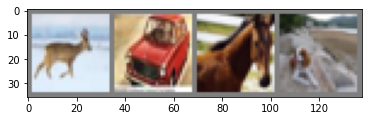

In [45]:
#show images 
import matplotlib.pyplot as plt
import numpy as np

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)


# functions to show an image
#WAY 1 

def imshow1(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
# show images
imshow1(torchvision.utils.make_grid(images[0:4]))
# print labels
print(' '.join('%7s' % classes[labels[j]] for j in range(4)))

two_image=images[0:2]
print(two_image.shape)
index=[[True],[False]]
index=[True,False]
new_image=two_image[index]
print(new_image.shape)

#WAY2 :

# # Set number of images to display
# num_images = 5

# # Display images with labels
# fig, axs = plt.subplots(1, num_images, figsize=(8, 8))
# fig.tight_layout()

# for i in range(num_images):
#     axs[i].axis('off')
#     axs[i].set_title(f'Label: {classes[labels[i]]}')
#     axs[i].imshow(np.transpose(images[i].numpy(), (1, 2, 0)))




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([128, 3, 32, 32])


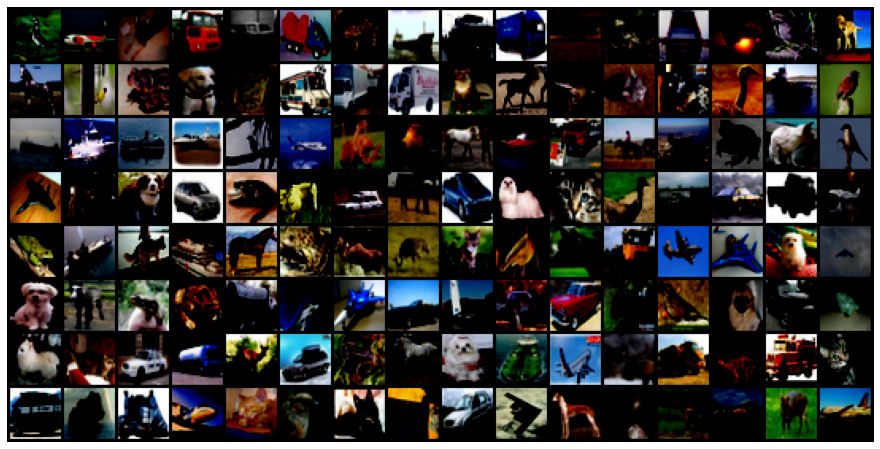

In [46]:
#PLOT A BATCH OF NORMALIZED IMAGE 
from torchvision.utils import make_grid
for images, _ in trainloader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

images.shape: torch.Size([128, 3, 32, 32])


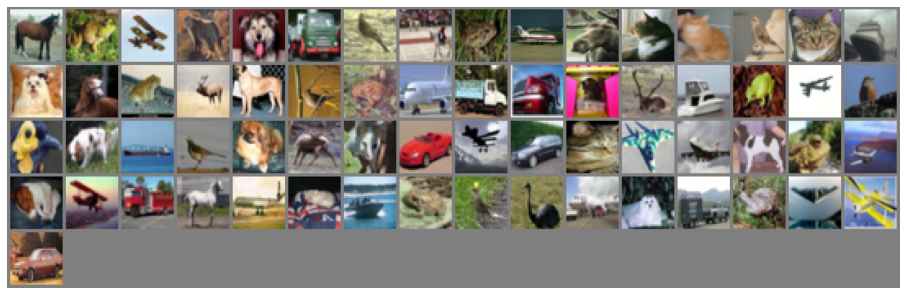

In [47]:
#PLOT A BATCH OF UNNORMALIZED IMAGE i.e RAW IMAGE 
from torchvision.utils import make_grid
for images, _ in trainloader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    imshow1(torchvision.utils.make_grid(images[0:Args.train_batch_size+1],nrow=16))
    break

In [48]:
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
class_count = {}
for _, index in dataset:
    label = classes[index]
    if label not in class_count:
        class_count[label] = 0
    class_count[label] += 1
class_count

Files already downloaded and verified


{'bird': 5000,
 'car': 5000,
 'cat': 5000,
 'deer': 5000,
 'dog': 5000,
 'frog': 5000,
 'horse': 5000,
 'plane': 5000,
 'ship': 5000,
 'truck': 5000}

In [49]:
class Net(nn.Module):

    def __init__(self):
        """ This function instantiates all the model layers """

        super(Net, self).__init__()
        dropout_rate=0
        self.convblock1 = nn.Sequential(
            # Input: 32x32x3 | Output: 32x32x32 | RF: 3x3
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),  
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(dropout_rate),

            # Input: 32x32x32 | Output: 32x32x64 | RF: 5x5
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(dropout_rate)
        )

        self.transblock1 = nn.Sequential(
            # Input: 32x32x64 | Output: 16x16x64 | RF: 6x6
            nn.MaxPool2d(2, 2),  
            # Input: 16x16x64 | Output: 16x16x32 | RF: 6x6
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=1)  
        )

        self.convblock2 = nn.Sequential(
            # Input: 16x16x32 | Output: 16x16x32 | RF: 10x10
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),  
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(dropout_rate),

            # Input: 16x16x32 | Output: 16x16x64 | RF: 14x14
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1), 
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(dropout_rate)
        )

        self.transblock2 = nn.Sequential(
            # Input: 16x16x64 | Output: 8x8x64 | RF: 16x16
            nn.MaxPool2d(2, 2),  
            # Input: 8x8x64 | Output: 8x8x32 | RF: 16x16
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=1)  
        )

        self.convblock3 = nn.Sequential(
             # Input: 8x8x32 | Output: 8x8x32 | RF: 24x24
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1), 
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(dropout_rate),

            # Depthwise separable convolution
            # Input: 8x8x32 | Output: 8x8x32 | RF: 32x32
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, groups=32, padding=1), 
             # Input: 8x8x32 | Output: 8x8x64 | RF: 32x32 
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=1), 
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(dropout_rate)
        )

        self.transblock3 = nn.Sequential(
            nn.MaxPool2d(2, 2),  # Input: 8x8x64 | Output: 4x4x64 | RF: 36x36
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=1)  # Input: 4x4x64 | Output: 4x4x32 | RF: 36x36
        )

        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
              # Input: 4x4x32 | Output: 4x4x32 | RF: 52x52
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(dropout_rate),

            # Dilated convolution
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1, dilation=2),
            # Input: 4x4x32 | Output: 2x2x64 | RF: 68X68
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(dropout_rate)
        )

        self.gap = nn.Sequential(
            #Input 2X2X64 |Output  1X1X64 | RF :76X 76
            nn.AvgPool2d(kernel_size=2),
            #Input 1X1X64 | Output 1X1X10 | RF :76 X76
            nn.Conv2d(in_channels=64,out_channels=10,kernel_size=(1,1),padding = 0, bias = True)
            #nn.AdaptiveAvgPool2d(1)
           
        ) 


        )
    
    def forward(self, x):
        """ This function defines the network structure """

        x = self.convblock1(x)
        x = self.transblock1(x)
        x = self.convblock2(x)
        x = self.transblock2(x)
        x = self.convblock3(x)
        x = self.transblock3(x)
        x = self.convblock4(x)
        x = self.gap(x)
        x = x.view(-1, 10)
        #x = self.fc(x)
        return x




In [50]:
# import torch.nn as nn

# class Net1(nn.Module):
#     def __init__(self, args):
#         super(Net, self).__init__()

#         self.layer1 = nn.Sequential(
#             nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3), padding=1, bias=False),
#             nn.ReLU(),
#             nn.BatchNorm2d(32),
#             nn.Dropout(args.dropout_value),  # In: 32x32x3 | Out: 32x32x32 | RF: 3x3

#             nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), padding=1, bias=False),
#             nn.ReLU(),
#             nn.BatchNorm2d(32), # In: 32x32x32 | Out: 32x32x32 | RF: 5x5
#         )
#         self.pool1 = nn.MaxPool2d(2, 2) # In: 32x32x32 | Out: 16x16x32 | RF: 6x6
#         self.layer2 = nn.Sequential(
#             nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1, bias=False),
#             nn.ReLU(),
#             nn.BatchNorm2d(64),
#             nn.Dropout(args.dropout_value),  # In: 16x16x32 | Out: 16x16x64 | RF: 10x10

#             nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False),
#             nn.ReLU(),
#             nn.BatchNorm2d(64), # In: 16x16x64 | Out: 16x16x64 | RF: 14x14
#         )
#         self.pool2 = nn.MaxPool2d(2, 2) # In: 16x16x64 | Out: 8x8x64 | RF:16x16
#         self.layer3 = nn.Sequential(
#             nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, groups=64, bias=False),
#             nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(1, 1), padding=0, bias=False),
#             nn.ReLU(),
#             nn.BatchNorm2d(64),
#             nn.Dropout(args.dropout_value),  # In: 8x8x64 | Out: 8x8x64 | RF: 24x24

#             nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False),
#             nn.ReLU(),
#             nn.BatchNorm2d(64), # In: 8x8x64 | Out: 8x8x64 | RF: 32x32
#         )
#         self.pool3 = nn.MaxPool2d(2, 2) # In: 8x8x64 | Out: 4x4x64 | RF: 36x36
#         self.layer4 = nn.Sequential(
#             nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), padding=1, dilation=2, bias=False),
#             nn.ReLU(),
#             nn.BatchNorm2d(128),
#             nn.Dropout(args.dropout_value),  # In: 4x4x64 | Out: 4x4x128 | RF: 68x68

#             nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), padding=1, bias=False),
#             nn.ReLU(),
#             nn.BatchNorm2d(128),  # In: 4x4x128 | Out: 4x4x128 | RF: 84x84
#         )
#         self.gap = nn.AdaptiveAvgPool2d(output_size=1)  # In: 4x4x128 | Out: 1x1x128 | RF: 108x108
#         self.layer5 = nn.Sequential(
#             nn.Linear(in_features=128, out_features=10),
#             # nn.ReLU() NEVER!
#         )

#     def forward(self, x):
#         x = self.layer1(x)
#         x = self.pool1(x)
#         x = self.layer2(x)
#         x = self.pool2(x)
#         x = self.layer3(x)
#         x = self.pool3(x)
#         x = self.layer4(x)
#         x = self.gap(x)
#         x = x.view(-1, 128)
#         x = self.layer5(x)
#         return x

In [51]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
#model = Net().to(device) 
model = Net().to(device) 
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,496
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
         MaxPool2d-9           [-1, 64, 16, 16]               0
           Conv2d-10           [-1, 32, 16, 16]           2,080
           Conv2d-11           [-1, 32, 16, 16]           9,248
             ReLU-12           [-1, 32, 16, 16]               0
      BatchNorm2d-13           [-1, 32, 16, 16]              64
          Dropout-14           [-1

In [52]:

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
#criterion = nn.CrossEntropyLoss()
lossfunc = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9,weight_decay=0.001)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

In [53]:
from tqdm import tqdm

class Trainer():

  def __init__(self):
    self.train_losses = []
    self.test_losses = []
    self.train_acc = []
    self.test_acc = []

  def train(self, model, device, train_loader, optimizer, loss_func, epoch, lambda_l1):
    model.train()
    pbar = tqdm(train_loader)
    correct = 0
    processed = 0
    for batch_idx, (data, target) in enumerate(pbar):
      # get samples
      data, target = data.to(device), target.to(device)

      # Init
      optimizer.zero_grad()
      # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
      # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

      # Predict
      y_pred = model(data)

      # Calculate loss
      loss = loss_func(y_pred, target)
      # L2 loss

      # L1 loss
      l1 = 0
      # lambda_l1 = 0.05
      for p in model.parameters():
        l1 = l1 + p.abs().sum()
      loss = loss + lambda_l1*l1

      self.train_losses.append(loss)

      # Backpropagation
      loss.backward()
      optimizer.step()


      # Update pbar-tqdm
      
      pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
      correct += pred.eq(target.view_as(pred)).sum().item()
      processed += len(data)
      # print('\nTrain set: Average loss: {:.4f}, Train Accuracy: {}/{} ({:.2f}%)\n'.format(
      # loss.item(), correct, len(test_loader.dataset),
      # 100. * correct / len(test_loader.dataset)))
      #print(f'Train set: Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
      pbar.set_description(desc= f'Train set: Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
      self.train_acc.append(100*correct/processed)
      tqdm._instances.clear()

  def test(self, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    self.test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Test Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    self.test_acc.append(100. * correct / len(test_loader.dataset))

  def getValues(self):
    return (self.train_losses, self.test_losses, self.train_acc, self.test_acc)

  

In [54]:

EPOCHS = 15

trainer = Trainer()

for epoch in range(EPOCHS):
  # print("EPOCH:", epoch, "last LR=",scheduler.get_last_lr(), "LR = ", scheduler.get_lr())
  print("EPOCH:", epoch+1)
  # def train(model, device, train_loader, optimizer, epoch, lambda_l1):
  trainer.train(model, device, trainloader, optimizer, lossfunc, epoch, 5e-4)
  scheduler.step()
  trainer.test(model, device, testloader)
  # scheduler.step() # for StepLR

(train_losses, test_losses, train_acc, test_acc) = trainer.getValues()




  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Train set: Loss=2.150233268737793 Batch_id=390 Accuracy=53.05: 100%|██████████| 391/391 [00:25<00:00, 15.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.9087, Test Accuracy: 5764/10000 (57.64%)

EPOCH: 2


Train set: Loss=1.640294075012207 Batch_id=390 Accuracy=66.25: 100%|██████████| 391/391 [00:25<00:00, 15.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.3569, Test Accuracy: 6409/10000 (64.09%)

EPOCH: 3


Train set: Loss=1.5545209646224976 Batch_id=390 Accuracy=69.93: 100%|██████████| 391/391 [00:25<00:00, 15.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.9634, Test Accuracy: 6887/10000 (68.87%)

EPOCH: 4


Train set: Loss=1.679046392440796 Batch_id=390 Accuracy=71.73: 100%|██████████| 391/391 [00:25<00:00, 15.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.9835, Test Accuracy: 6675/10000 (66.75%)

EPOCH: 5


Train set: Loss=1.4707448482513428 Batch_id=390 Accuracy=73.09: 100%|██████████| 391/391 [00:25<00:00, 15.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.1372, Test Accuracy: 7019/10000 (70.19%)

EPOCH: 6


Train set: Loss=1.2057209014892578 Batch_id=390 Accuracy=74.07: 100%|██████████| 391/391 [00:25<00:00, 15.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.3272, Test Accuracy: 7249/10000 (72.49%)

EPOCH: 7


Train set: Loss=1.479221224784851 Batch_id=390 Accuracy=80.96: 100%|██████████| 391/391 [00:26<00:00, 14.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.0088, Test Accuracy: 7977/10000 (79.77%)

EPOCH: 8


Train set: Loss=1.1201770305633545 Batch_id=390 Accuracy=82.91: 100%|██████████| 391/391 [00:25<00:00, 15.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.0116, Test Accuracy: 8045/10000 (80.45%)

EPOCH: 9


Train set: Loss=0.8998559713363647 Batch_id=390 Accuracy=83.75: 100%|██████████| 391/391 [00:25<00:00, 15.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.3315, Test Accuracy: 8071/10000 (80.71%)

EPOCH: 10


Train set: Loss=1.030413031578064 Batch_id=390 Accuracy=84.36: 100%|██████████| 391/391 [00:25<00:00, 15.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.4031, Test Accuracy: 8129/10000 (81.29%)

EPOCH: 11


Train set: Loss=1.2434009313583374 Batch_id=390 Accuracy=84.72: 100%|██████████| 391/391 [00:25<00:00, 15.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.5453, Test Accuracy: 8046/10000 (80.46%)

EPOCH: 12


Train set: Loss=0.9368709325790405 Batch_id=390 Accuracy=85.03: 100%|██████████| 391/391 [00:25<00:00, 15.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.4813, Test Accuracy: 8082/10000 (80.82%)

EPOCH: 13


Train set: Loss=0.9849225282669067 Batch_id=390 Accuracy=87.73: 100%|██████████| 391/391 [00:25<00:00, 15.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.6861, Test Accuracy: 8266/10000 (82.66%)

EPOCH: 14


Train set: Loss=1.017586350440979 Batch_id=390 Accuracy=88.50: 100%|██████████| 391/391 [00:25<00:00, 15.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.7094, Test Accuracy: 8249/10000 (82.49%)

EPOCH: 15


Train set: Loss=0.7655152082443237 Batch_id=390 Accuracy=88.91: 100%|██████████| 391/391 [00:25<00:00, 15.33it/s]



Test set: Average loss: -5.6779, Test Accuracy: 8255/10000 (82.55%)



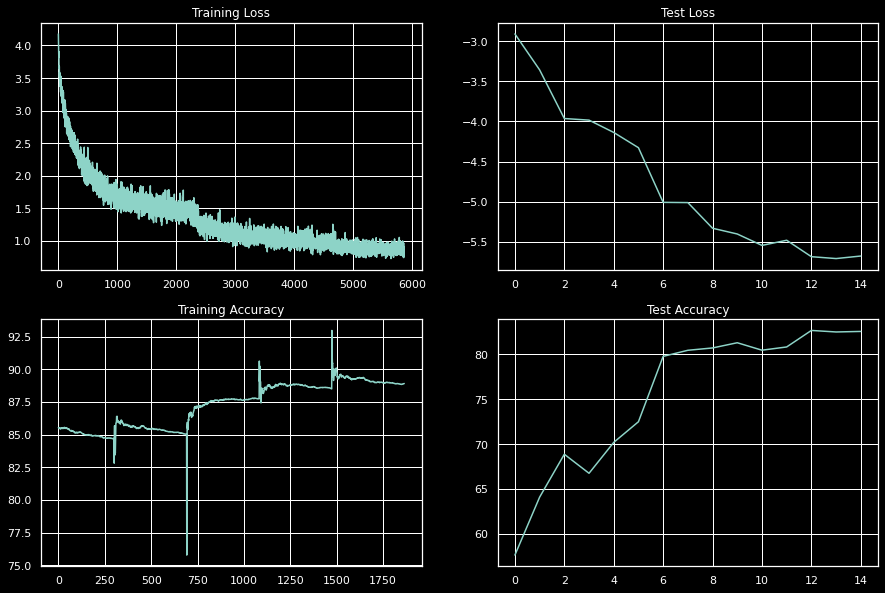

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.style.use("dark_background")

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc[4000:])
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.show()

In [56]:
torch.save(model,'./data/cifar')
model = torch.load('./data/cifar')
model.eval()

Net(
  (convblock1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0, inplace=False)
  )
  (transblock1): Sequential(
    (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (1): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
  )
  (convblock2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm

In [57]:
#GET PERCENTAGE ACCURACY FOR EACH CLASS
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for images,labels in testloader:
        #images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 95 %
Accuracy of   car : 83 %
Accuracy of  bird : 66 %
Accuracy of   cat : 71 %
Accuracy of  deer : 84 %
Accuracy of   dog : 80 %
Accuracy of  frog : 88 %
Accuracy of horse : 81 %
Accuracy of  ship : 90 %
Accuracy of truck : 90 %


In [58]:
def get_misclassified(model, test_loader, device):
  misclassified = []
  misclassified_pred = []
  misclassified_target = []
  # put the model to evaluation mode
  model.eval()
  # turn off gradients
  with torch.no_grad():
      for data, target in test_loader:
        # move them to the respective device
        data, target = data.to(device), target.to(device)
        # do inferencing
        output = model(data)
        # get the predicted output
        pred = output.argmax(dim=1, keepdim=True)

        # get the current misclassified in this batch
        list_misclassified = (pred.eq(target.view_as(pred)) == False).squeeze()
        #list_misclassified  = [item for sublist in list_misclassified  for item in sublist]
        #print(list_misclassified)
        #print(data.shape)
        batch_misclassified = data[list_misclassified]
        batch_mis_pred = pred[list_misclassified]
        batch_mis_target = target.view_as(pred)[list_misclassified]

        misclassified.append(batch_misclassified)
        misclassified_pred.append(batch_mis_pred)
        misclassified_target.append(batch_mis_target)
        #print(len(misclassified))

  # group all the batched together
  misclassified = torch.cat(misclassified)
  misclassified_pred = torch.cat(misclassified_pred)
  misclassified_target = torch.cat(misclassified_target)

  return  misclassified, misclassified_pred, misclassified_target

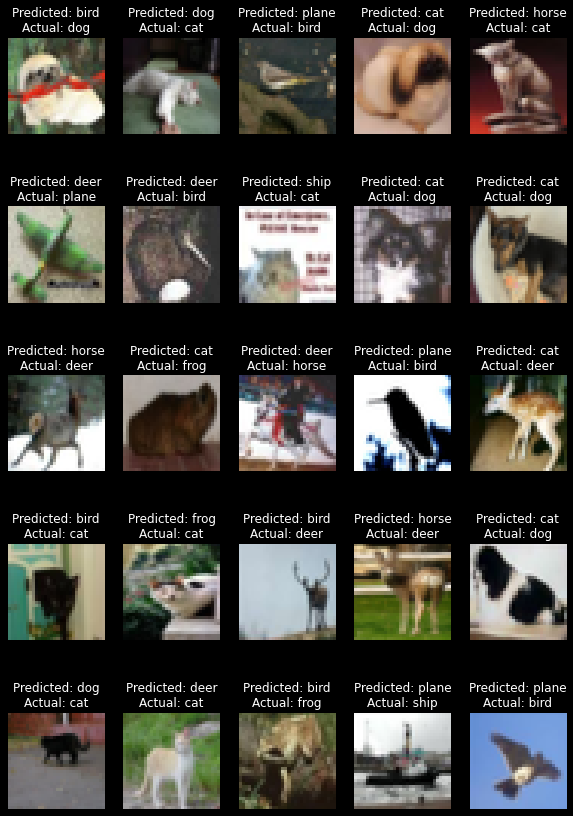

In [59]:
model = torch.load('./data/cifar')
model.eval()
import math 
def plot_misclassified(number,test_loader, device,model):
    image_data, predicted, actual = get_misclassified(model,testloader,device)
    nrows = math.floor(math.sqrt(number))
    ncols = math.ceil(math.sqrt(number))

    fig, ax = plt.subplots(nrows, ncols, figsize=(10, 15))

    for i in range(nrows):
        for j in range(ncols):
            index = i * ncols + j
            ax[i, j].axis("off")
            ax[i, j].set_title("Predicted: %s\nActual: %s" % (classes[predicted[index]], classes[actual[index]]))
            #FIRST UNNORMALIZE THEN SHOW 
            ax[i, j].imshow(np.transpose(image_data[index].cpu().numpy()/ 2 + 0.5, (1, 2, 0)), cmap="gray_r")
            



plot_misclassified(25, testloader, device,model)